In [16]:
import rstoolbox as rs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 01  Boxplots

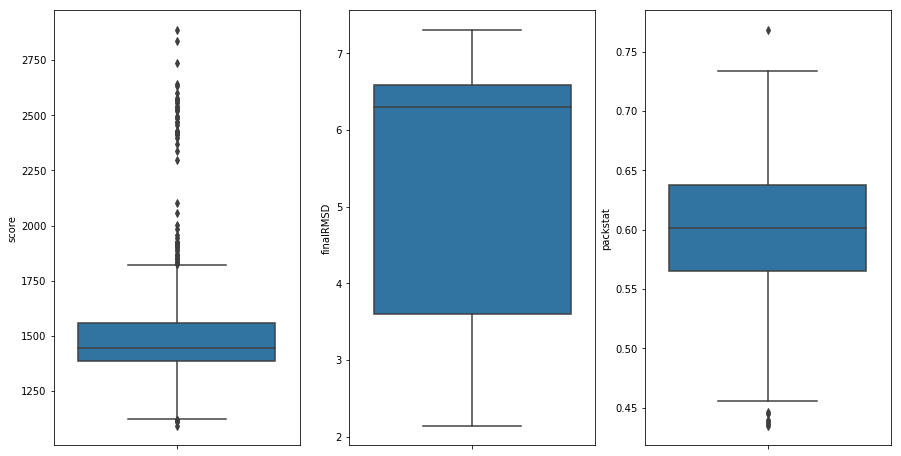

In [17]:
silent_file = '3H_B2H_A1H_B1H' 
rules = {'scores': ['score', 'packstat', 'finalRMSD']} 
df = rs.io.parse_rosetta_file(silent_file, rules) 

fig  = plt.figure(figsize=(15, 8))
grid = [1,3]
axes = rs.plot.multiple_distributions(df, fig, grid)
plt.show()

### 02  Score - RMSD Scatter

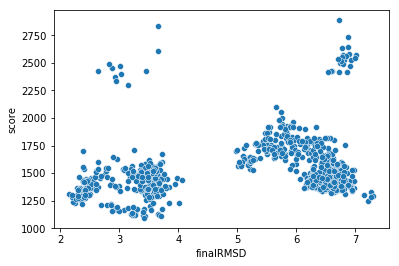

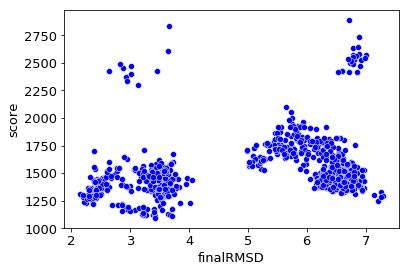

In [18]:
rules = {'scores': ['score', 'finalRMSD']} 
df1 = rs.io.parse_rosetta_file(silent_file, rules) 

# Approach 1: use seaborn
sns.scatterplot(x='finalRMSD', y='score', data=df1)
plt.show()

# Approach 2: use matplotlib
plt.scatter(data=df1, c='blue', x='finalRMSD', y='score', edgecolors='white', linewidths=0.5)

plt.tick_params(labelsize=13)
plt.xlabel('finalRMSD', fontsize=13)
plt.ylabel('score', fontsize=13)
plt.show()
# plt.savefig('sc_rmsd.png', dpi=300)

### 03  Violin Plots

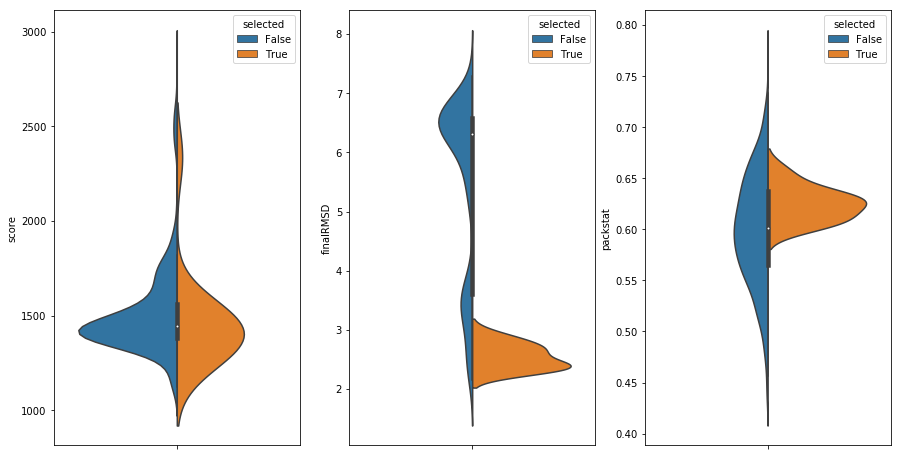

In [19]:
score_def = {'scores':['score', 'finalRMSD','packstat', 'description'],'naming': ['', 'bb']}
df = rs.io.parse_rosetta_file(silent_file, score_def)
pck = df[(df['packstat'] >= 0.6) & (df['finalRMSD'] <= 3)].sort_values('score') 
df = df.assign(selected=df['description'].isin(pck['description']))

fig = plt.figure(figsize=(15, 8))
grid = (1, 3)
props = ['score', 'finalRMSD', 'packstat']
for i in range(3):
    ax = plt.subplot2grid(grid, (0, i))
    sns.violinplot(x='bb', y=props[i], hue='selected', 
                   data=df, split=True, ax=ax)
    ax.set_xlabel('')
    ax.set_xticklabels([''])
plt.show()
# plt.savefig('violin.png', dpi=75)

### 04  Sequence Frequency 

In [20]:
seq = {'sequence': 'A'}
dseq = rs.io.parse_rosetta_file(silent_file, seq)
dseq = rs.analysis.sequential_frequencies(dseq, 'A')
dseq.head()

,C,D,S,Q,K,I,P,T,F,N,G,H,L,R,W,A,V,E,Y,M
1,0.0,0.398,0.162,0.010,0.086,0.001,0.048,0.061,0.000,0.027,0.078,0.017,0.003,0.011,0.000,0.002,0.000,0.095,0.001,0.000
2,0.0,0.233,0.066,0.007,0.020,0.000,0.020,0.262,0.000,0.009,0.093,0.007,0.000,0.008,0.000,0.000,0.012,0.260,0.003,0.000
3,0.0,0.168,0.076,0.005,0.069,0.017,0.001,0.062,0.005,0.009,0.192,0.010,0.058,0.007,0.004,0.090,0.004,0.216,0.004,0.003
4,0.0,0.120,0.022,0.014,0.036,0.011,0.000,0.047,0.003,0.003,0.216,0.002,0.058,0.007,0.002,0.128,0.026,0.272,0.025,0.008
5,0.0,0.201,0.016,0.012,0.228,0.014,0.000,0.055,0.000,0.011,0.003,0.003,0.021,0.044,0.003,0.089,0.026,0.262,0.011,0.001


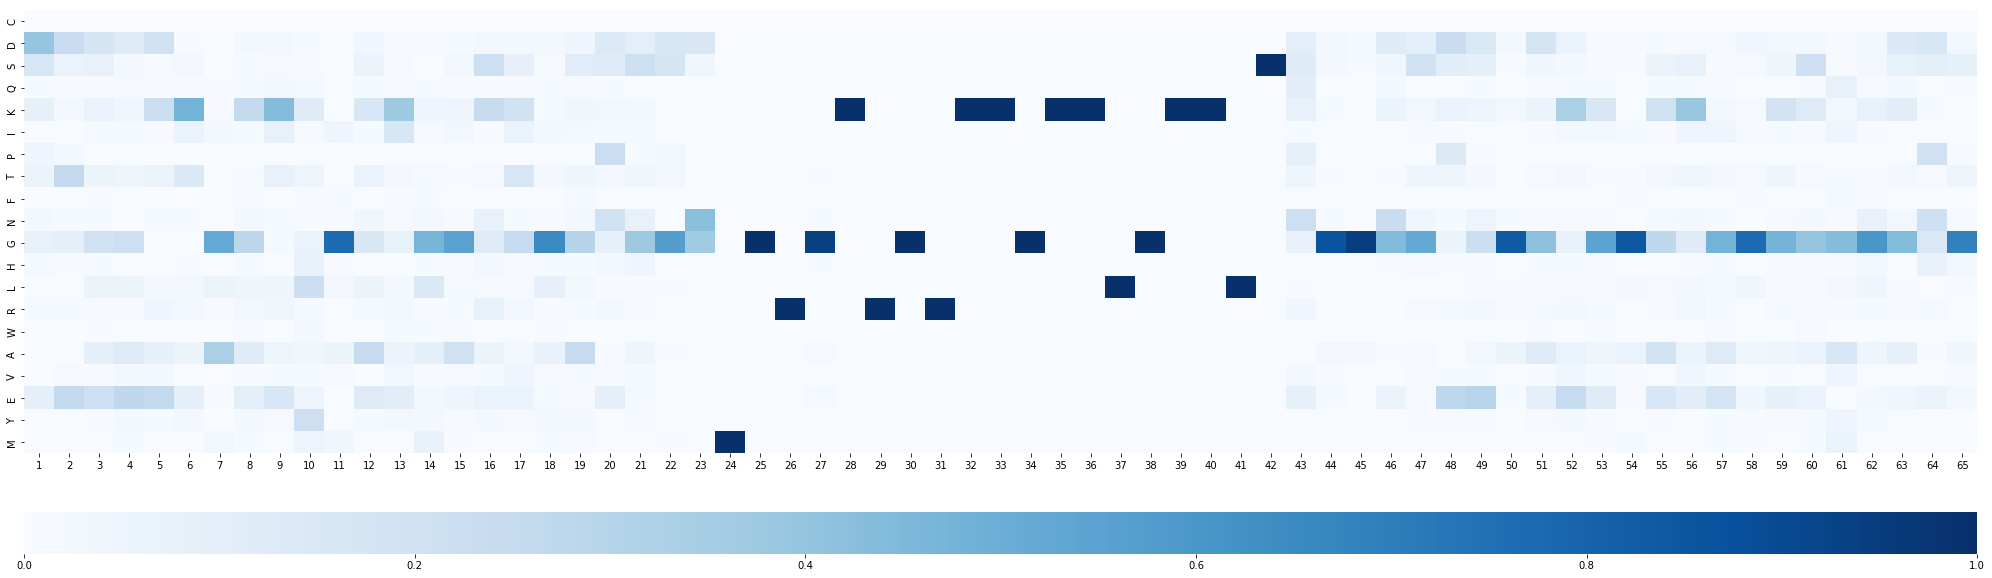

In [21]:
fig  = plt.figure(figsize=(35,10))
ax = plt.subplot2grid((11, 1), (0, 0), fig=fig, colspan=1, rowspan=9)
cbar_ax = plt.subplot2grid((11, 1), (10, 0), fig=fig, colspan=1, rowspan=1)
sns.heatmap(dseq.T, cmap="Blues", ax=ax, vmin=0, yticklabels=True, cbar_ax=cbar_ax, 
            cbar_kws = {"orientation": "horizontal"})
plt.show()

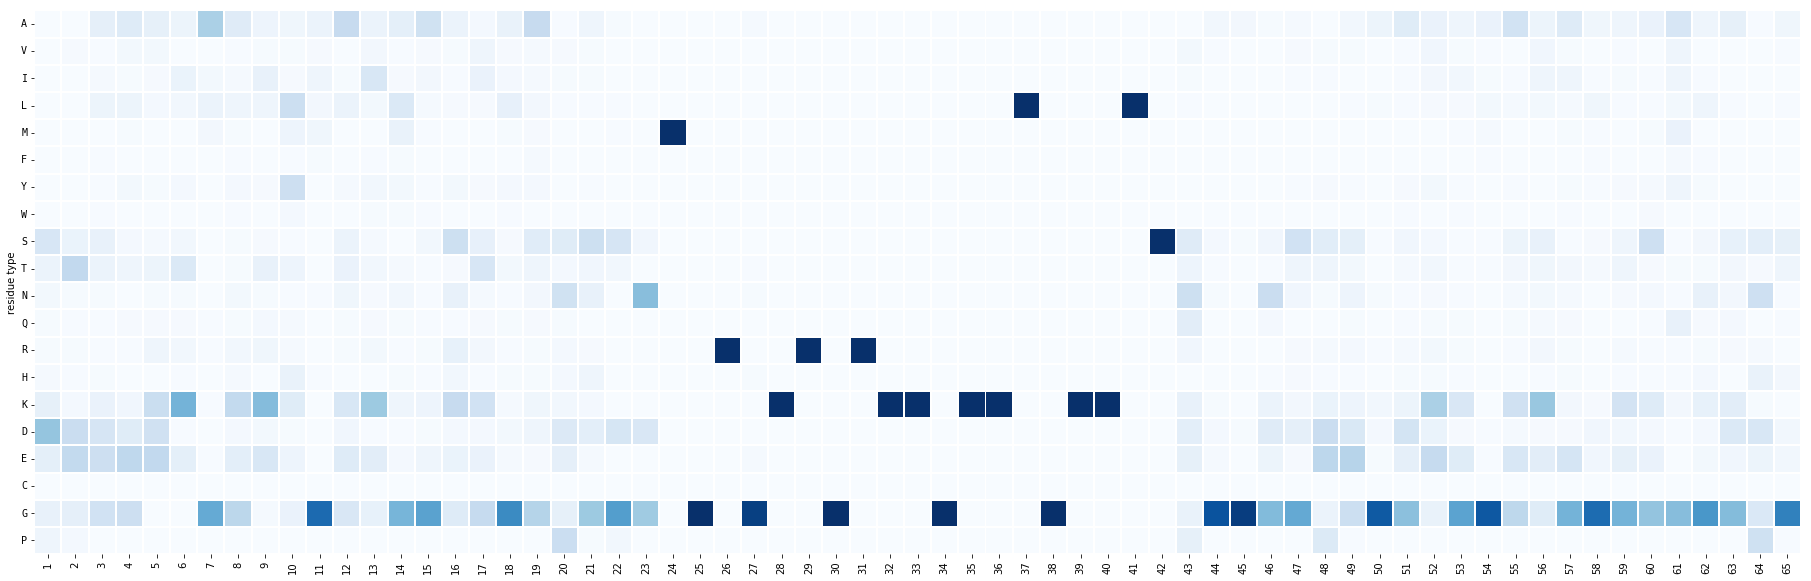

In [22]:
fig = plt.figure(figsize=(35,10))
ax = plt.subplot2grid((1, 1), (0, 0))
rs.plot.sequence_frequency_plot(dseq, "A", ax, refseq=False, cbar=False, xrotation=90)
plt.show()

### 05  Web Logo


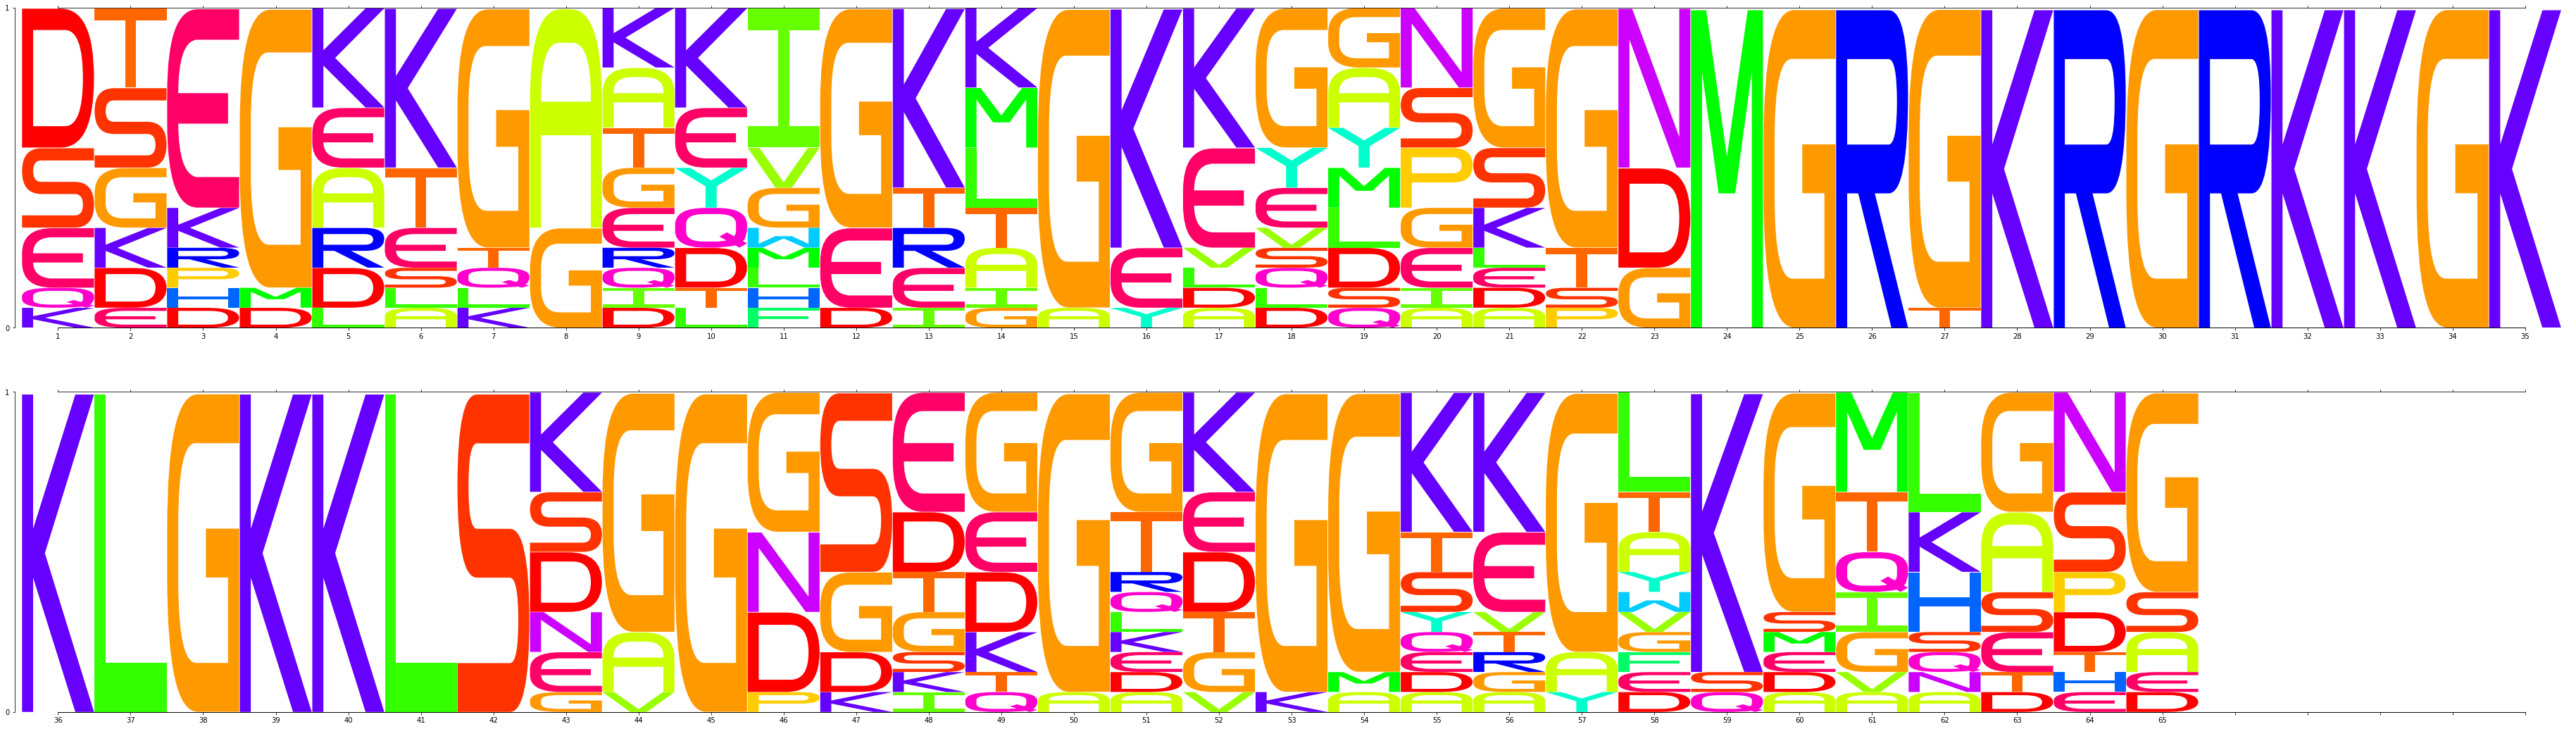

In [23]:
rules = {'scores': ['score', 'BUNS', 'packstat', 'finalRMSD'], 'sequence': 'A'} 
df = rs.io.parse_rosetta_file(silent_file, rules) 

pck = df[(df['packstat'] >= 0.6) & (df['finalRMSD'] <= 3)]

fig, axes = rs.plot.logo_plot(pck, "A", refseq=False, line_break=35)

### 06 Ramachandran Plots

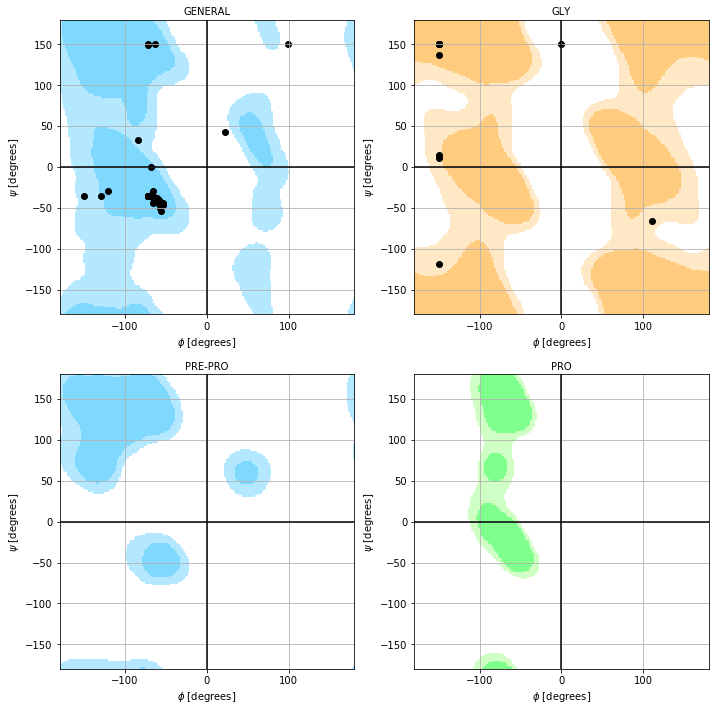

In [24]:
ref = rs.io.get_sequence_and_structure('sketch_0001.pdb')
figure = plt.figure(figsize=(10,10))
rs.plot.plot_ramachandran(ref.iloc[0], 'A', figure)
figure = plt.tight_layout()
figure = plt.savefig('allrama.png', dpi=75)